In [4]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
# May have to do this...
#!pip install imblearn
#!pip install --upgrade sklearn

In [6]:
df=pd.read_csv("file:///C:/Users/P4/Desktop/creditcard.csv", low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,6844.0,-2.228361,-4.124061,1.744205,-1.260328,1.302252,-1.817851,-2.801154,0.364167,-0.160434,...,0.325900,0.562232,0.901750,-0.084381,-0.998450,-0.428832,0.112302,0.294566,117.00,0
1,77703.0,-2.098577,-5.427762,0.461841,4.266988,-2.996195,1.855427,0.723641,0.236076,0.847210,...,1.076049,-0.145099,-1.530168,0.455085,-0.178250,0.064637,-0.218782,0.307075,1608.66,0
2,76193.0,1.274906,-1.185268,1.008731,-0.788584,-1.311051,0.923460,-1.593488,0.370915,0.136255,...,0.364838,1.062072,-0.331436,-0.888917,0.524611,0.069413,0.061457,0.017487,59.99,0
3,145194.0,2.088637,-0.398626,-2.442209,-0.817304,0.615539,-0.762738,0.411264,-0.224755,0.524513,...,0.108087,0.332329,-0.057758,0.293096,0.284022,1.058572,-0.161840,-0.098822,32.67,0
4,152055.0,2.086303,0.222409,-1.748963,0.371876,0.576037,-0.769118,0.246946,-0.280569,0.360922,...,-0.363851,-0.895797,0.308897,0.404924,-0.205204,0.178142,-0.056736,-0.029960,1.98,0


In [7]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


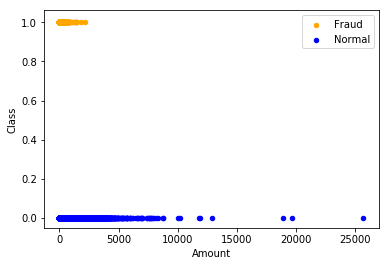

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [8]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

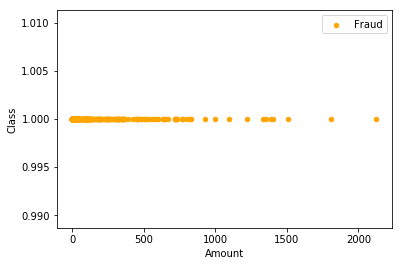

In [9]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

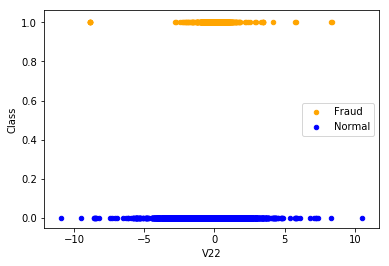

This feature may not be very important because of the similar distribution.


In [10]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression

In [11]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 194 0.0019461693568612502
Number of frauds on y_train: 298 0.0016097318554050258


In [13]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9989566927159095


In [29]:
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml

In [30]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99474    15    99489
True          89   105      194
__all__    99563   120    99683


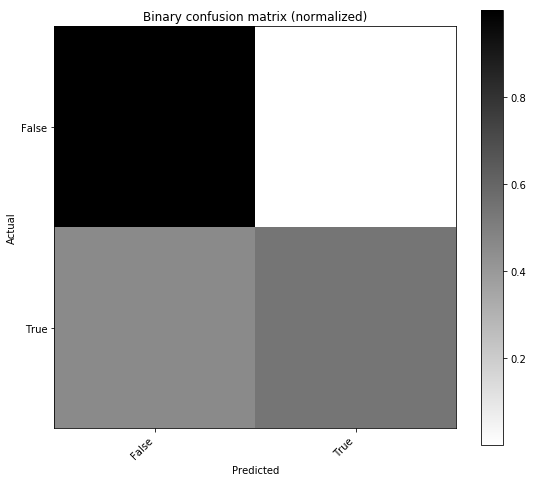

population: 99683
P: 194
N: 99489
PositiveTest: 120
NegativeTest: 99563
TP: 105
TN: 99474
FP: 15
FN: 89
TPR: 0.5412371134020618
TNR: 0.9998492295630673
PPV: 0.875
NPV: 0.9991060936291595
FPR: 0.00015077043693272624
FDR: 0.125
FNR: 0.4587628865979381
ACC: 0.9989566927159095
F1_score: 0.6687898089171974
MCC: 0.6877258680356125
informedness: 0.5410863429651291
markedness: 0.8741060936291594
prevalence: 0.0019461693568612502
LRP: 3589.809278350515
LRN: 0.45883206490884315
DOR: 7823.797752808989
FOR: 0.0008939063708405733


In [31]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [32]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.4587628865979381


In [ ]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

# Logistic Regression with SMOTE over-sampling

In [33]:
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 369652


In [34]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']

# NOTE: Scaling makes it worse.
# X_train_sampled = scale(X_train_sampled)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9829660022270598


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      97812  1677    99489
True          21   173      194
__all__    97833  1850    99683


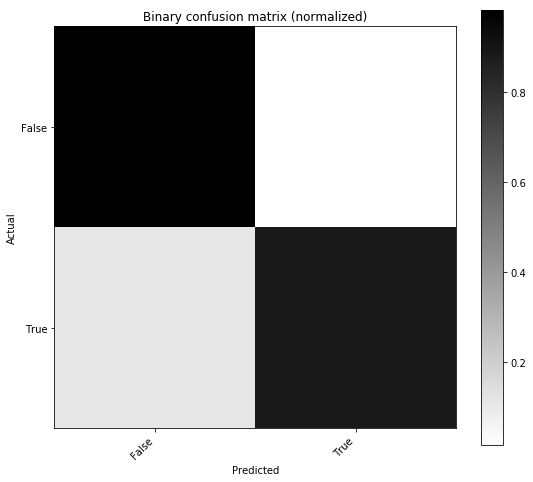

population: 99683
P: 194
N: 99489
PositiveTest: 1850
NegativeTest: 97833
TP: 173
TN: 97812
FP: 1677
FN: 21
TPR: 0.8917525773195877
TNR: 0.9831438651509212
PPV: 0.09351351351351352
NPV: 0.9997853485020392
FPR: 0.01685613484907879
FDR: 0.9064864864864864
FNR: 0.10824742268041238
ACC: 0.9829660022270598
F1_score: 0.16927592954990214
MCC: 0.285704116988107
informedness: 0.8748964424705088
markedness: 0.0932988620155526
prevalence: 0.0019461693568612502
LRP: 52.90374011028531
LRN: 0.11010333941695852
DOR: 480.4916943521595
FOR: 0.00021465149796081077


In [37]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [38]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.10824742268041238


# Logistic Regression with balanced class weights

In [39]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Best C is 707.7288595822722 with best FNR of 0.08247422680412371.
